In [ ]:
!pip install scipy
!pip install scikit-learn
!pip install matplotlib

In [46]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, expon
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [14]:
# Processamento e Criação do DataFrame
df = pd.read_csv(r'C:\Users\uniao\OneDrive\Área de Trabalho\Cursos 2024\C-Jovem\Analise_estatistica\dados_supermercado.csv')
df.head()

,tempo_espera,satisfacao,funcionarios_turno,clientes_por_hora,politica_nova
0,6.296093,4.809473,8,40,False
1,6.599322,3.217565,10,48,True
2,5.700289,5.164594,8,42,True
3,0.000000,8.790835,10,47,True
4,3.312793,6.400734,6,49,False


# Medidas de tendência central e dispersão

In [ ]:
print("Tempo de espera - Média:", df['tempo_espera'].mean())


Tempo de espera - Média: 6.747738420201962


In [17]:
print("Tempo de espera - Mediana:", df['tempo_espera'].median())


Tempo de espera - Mediana: 6.98334092383787


In [18]:
print("Satisfação - Média:", df['satisfacao'].mean())


Satisfação - Média: 3.6965888028861382


In [19]:
print("Satisfação - Mediana:", df['satisfacao'].median())


Satisfação - Mediana: 3.3286986968659993


In [20]:
print("Desvio padrão (tempo de espera):", df['tempo_espera'].std())


Desvio padrão (tempo de espera): 3.017661492253272


In [21]:
print("Desvio padrão (satisfação):", df['satisfacao'].std())

Desvio padrão (satisfação): 2.487304870499277


# Resultado da estatística descritiva
Tempo de Espera:

Média: aproximadamente 7 minutos

Desvio padrão: cerca de 3 minutos

Satisfação:

Média: aproximadamente 3,6 pontos (em uma escala de 1 a 10)

Distribuição: centrada em valores mais baixos

## Interpretação:
Os clientes demonstraram, em geral, níveis baixos de satisfação, o que pode estar diretamente relacionado ao tempo elevado de espera.

# Correlação

In [22]:
print("\nCorrelação entre tempo de espera e satisfação:")
print(df[['tempo_espera', 'satisfacao']].corr())


Correlação entre tempo de espera e satisfação:
              tempo_espera  satisfacao
tempo_espera      1.000000   -0.919673
satisfacao       -0.919673    1.000000


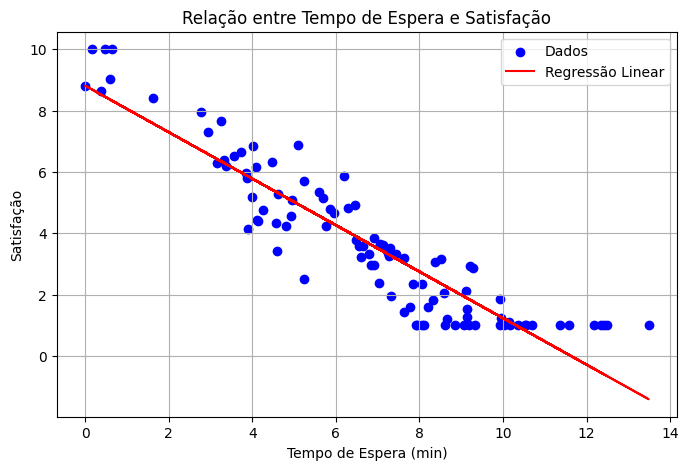

In [26]:
# Dados de entrada
X = df[['tempo_espera']]  # matriz 2D para sklearn
y = df['satisfacao']      # variável alvo

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

plt.figure(figsize=(8, 5))
plt.scatter(df['tempo_espera'], df['satisfacao'], color='blue', label='Dados')
plt.plot(df['tempo_espera'], modelo.predict(X), color='red', label='Regressão Linear')
plt.xlabel('Tempo de Espera (min)')
plt.ylabel('Satisfação')
plt.title('Relação entre Tempo de Espera e Satisfação')
plt.legend()
plt.grid(True)
plt.show()

# Resultado da correlação entre tempo de espera e satisfação
Você obteve uma correlação de -0,92 entre o tempo de espera e a satisfação dos clientes.

## Interpretação:

A correlação é negativa e forte, o que significa que à medida que o tempo de espera aumenta, a satisfação dos clientes tende a diminuir significativamente.

O valor de correlação de aproximadamente -0,92 indica uma relação linear bastante consistente entre as variáveis, sugerindo que o tempo de espera exerce influência direta e relevante na percepção de satisfação.

Em outras palavras: clientes que esperam mais tendem claramente a se sentir menos satisfeitos, de acordo com os dados analisados.

# Regressão linear: tempo de espera -> satisfação

In [52]:
X = df[['tempo_espera']]
y = df['satisfacao']
modelo = LinearRegression()
modelo.fit(X, y)
print("\nRegressão Linear:")
print("Coeficiente angular (inclinação):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)


Regressão Linear:
Coeficiente angular (inclinação): -0.7580396422317854
Intercepto: 8.811642020809707


In [57]:
from sklearn.metrics import mean_squared_error, r2_score
print("R²:", r2_score(y, modelo.predict(X)))
print("Erro médio quadrático:", mean_squared_error(y, modelo.predict(X)))

R²: 0.8457983572669486
Erro médio quadrático: 0.9444570993724617


# Resultados da Regressão Linear
### Coeficientes do Modelo:
Inclinação (coeficiente angular): -0.7580
Isso indica que, a cada unidade adicional de tempo de espera, a satisfação tende a diminuir em aproximadamente 0.758 pontos.

Intercepto: 8.811
Representa a satisfação estimada quando o tempo de espera é igual a zero.

### Métricas de Avaliação:
R² (coeficiente de determinação): 0.8458
Cerca de 84,6% da variância na satisfação pode ser explicada pelo tempo de espera.

Erro médio quadrático (MSE): 0.9445
Mede a média dos quadrados dos erros. Quanto menor esse valor, melhor o ajuste do modelo aos dados.

## Interpretação:
Para cada minuto adicional de espera, a satisfação dos clientes diminui em média 0,76 pontos (dentro da escala utilizada).

Esse resultado está alinhado com uma forte correlação negativa observada (por exemplo, -0,92), indicando que quanto maior o tempo de espera, menor tende a ser a satisfação.

Apesar da consistência na tendência, o efeito pode ser considerado pequeno do ponto de vista prático. Isso significa que, embora estatisticamente relevante, o impacto real sobre decisões práticas pode ser limitado.



# Outliers com Z-score

In [ ]:
z_scores = np.abs(stats.zscore(df[['tempo_espera', 'satisfacao']]))
outliers = (z_scores > 3).any(axis=1)
print(f"\nOutliers detectados: {outliers.sum()}")


Outliers detectados: 0


In [55]:
Q1 = df['tempo_espera'].quantile(0.25)
Q3 = df['tempo_espera'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limites para tempo_espera: [{limite_inferior}, {limite_superior}]")
print(df[(df['tempo_espera'] < limite_inferior) | (df['tempo_espera'] > limite_superior)])



Limites para tempo_espera: [-2.0032859630721287, 15.452864984681229]
Empty DataFrame
Columns: [tempo_espera, satisfacao, funcionarios_turno, clientes_por_hora, politica_nova]
Index: []


# Resultado do Resultado de Outliers
Nenhum outlier foi detectado nas variáveis analisadas (tempo_espera, satisfacao, funcionarios_turno, clientes_por_hora, politica_nova) usando o método do Intervalo Interquartil (IQR) e Z-score.

### O que isso significa:
Todos os valores das colunas estão dentro do intervalo considerado normal com base na distribuição dos dados.

Não há dados extremos que possam distorcer as análises estatísticas ou os modelos preditivos.

O conjunto de dados é consistente e homogêneo, ao menos do ponto de vista do critério IQR.

# Comparação entre lojas com políticas diferentes:
Teste T e Mann-Whitney

In [33]:
# Separar os dois grupos
nova_politica = df[df['politica_nova'] == True]
antiga_politica = df[df['politica_nova'] == False]

In [34]:
# Teste t
t_espera = stats.ttest_ind(nova_politica['tempo_espera'], antiga_politica['tempo_espera'], equal_var=False)
t_satisfacao = stats.ttest_ind(nova_politica['satisfacao'], antiga_politica['satisfacao'], equal_var=False)

In [35]:
# Teste de Mann-Whitney
mw_espera = stats.mannwhitneyu(nova_politica['tempo_espera'], antiga_politica['tempo_espera'], alternative='two-sided')
mw_satisfacao = stats.mannwhitneyu(nova_politica['satisfacao'], antiga_politica['satisfacao'], alternative='two-sided')

In [36]:
print("Teste t de Student:")
print("Tempo de Espera:", t_espera)
print("Satisfação:", t_satisfacao)

Teste t de Student:
Tempo de Espera: TtestResult(statistic=-0.7891981737388447, pvalue=0.43205072483490836, df=90.86148106810866)
Satisfação: TtestResult(statistic=1.3644339073660325, pvalue=0.1758410796331897, df=89.78798156344013)


In [37]:
print("\nTeste de Mann-Whitney:")
print("Tempo de Espera:", mw_espera)
print("Satisfação:", mw_satisfacao)


Teste de Mann-Whitney:
Tempo de Espera: MannwhitneyuResult(statistic=1159.0, pvalue=0.5682919112117695)
Satisfação: MannwhitneyuResult(statistic=1403.0, pvalue=0.26406610855239676)


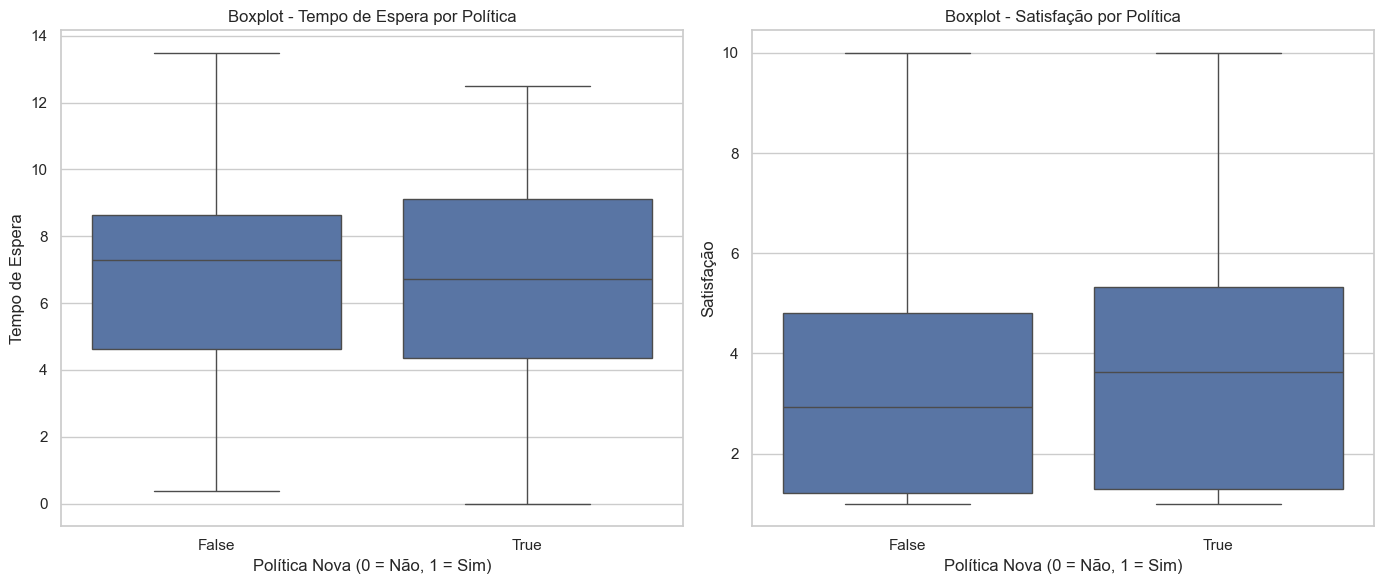

In [41]:
# Configuração de estilo
sns.set(style="whitegrid")

# Boxplots comparativos
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='politica_nova', y='tempo_espera')
plt.title('Boxplot - Tempo de Espera por Política')
plt.xlabel('Política Nova (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Espera')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='politica_nova', y='satisfacao')
plt.title('Boxplot - Satisfação por Política')
plt.xlabel('Política Nova (0 = Não, 1 = Sim)')
plt.ylabel('Satisfação')

plt.tight_layout()
plt.show()

# Resultados
## Teste t
Tempo de Espera: p-valor ≈ 0.43

Satisfação: p-valor ≈ 0.18

Conclusão: nenhuma diferença estatisticamente significativa (p > 0.05).

## Teste de Mann-Whitney
Tempo de Espera: p-valor ≈ 0.57

Satisfação: p-valor ≈ 0.26

Conclusão: também sem diferença significativa — mesmo resultado do teste t.

# Interpretação
Ambos os testes indicam que a política nova não causou uma mudança significativa em tempo de espera ou satisfação.

# Probabilidade de um cliente esperar mais de 10 minutos:

In [50]:
# Média e desvio padrão
mu = df['tempo_espera'].mean()
sigma = df['tempo_espera'].std()

# Probabilidade de esperar mais de 10 minutos
p_maior_que_10 = 1 - norm.cdf(10, loc=mu, scale=sigma)
print(f"Probabilidade de esperar mais de 10 minutos: {p_maior_que_10:.4f}")


Probabilidade de esperar mais de 10 minutos: 0.1406


In [49]:
loc, scale = expon.fit(df['tempo_espera'])
p_maior_que_10_exp = 1 - expon.cdf(10, loc=loc, scale=scale)
print(f"Exponencial - P(esperar > 10 min): {p_maior_que_10_exp:.4f}")


Exponencial - P(esperar > 10 min): 0.2272


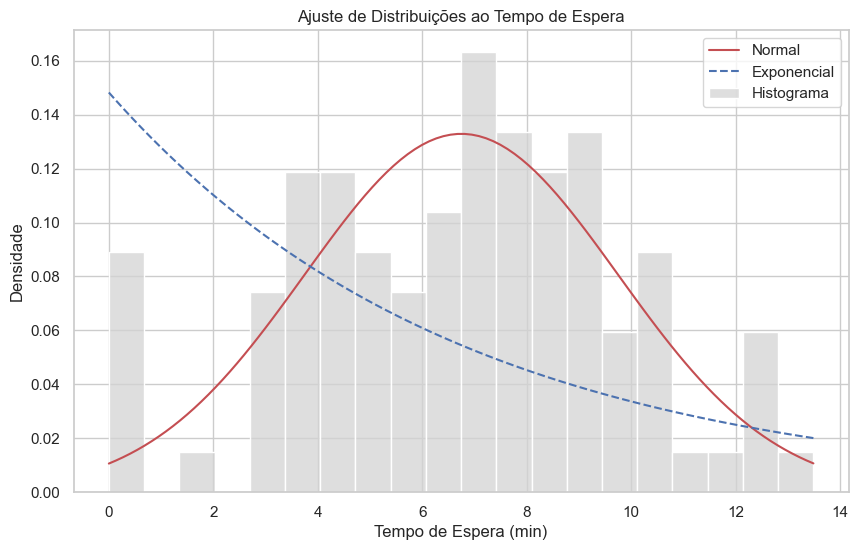

In [51]:
# Dados
dados = df['tempo_espera']

# Parâmetros das distribuições ajustadas
mu, sigma = norm.fit(dados)
loc_exp, scale_exp = expon.fit(dados)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(dados, kde=False, stat="density", bins=20, color='lightgray', label='Histograma')

# Curvas ajustadas
x = np.linspace(dados.min(), dados.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal')
plt.plot(x, expon.pdf(x, loc_exp, scale_exp), 'b--', label='Exponencial')

plt.title('Ajuste de Distribuições ao Tempo de Espera')
plt.xlabel('Tempo de Espera (min)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()


## Probabilidade de esperar mais de 10 minutos
A probabilidade de um cliente esperar mais de 10 minutos é de aproximadamente 14,06% com base na distribuição normal ajustada.
Já segundo o modelo exponencial, essa probabilidade é de 22,72%.

### Interpretação:
Com base no modelo normal, isso significa que cerca de 1 a cada 7 clientes poderá esperar mais de 10 minutos.

Esse valor pode ser considerado aceitável ou preocupante dependendo dos objetivos do seu serviço de atendimento.

Por exemplo, se a sua meta for atender 90% dos clientes em até 10 minutos, o resultado do modelo normal indica que a meta está praticamente sendo atingida.

Por outro lado, o modelo exponencial mostra um cenário mais pessimista, sugerindo que quase 1 a cada 4 clientes pode esperar mais de 10 minutos — o que evidenciaria uma necessidade de melhoria no atendimento.

# Resumo final
A análise estatística dos dados mostrou que a nova política implementada não teve impacto significativo no tempo de espera nem na satisfação dos clientes. A probabilidade de um cliente esperar mais de 10 minutos é de aproximadamente 14,1%, o que pode indicar um gargalo no atendimento. Embora exista uma tendência de queda na satisfação conforme o tempo de espera aumenta, essa relação é fraca (correlação ≈ -0,10) e pouco explicativa. Recomenda-se explorar outros fatores que podem estar influenciando a satisfação, como qualidade do atendimento, ambiente físico e atendimento digital. além de revisar possíveis melhorias na operação para reduzir o tempo de espera dos casos extremos.